# Breast Cancer Type Diagnosis Classification

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("data.csv")

In [56]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [58]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [59]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [60]:
df.drop('id',axis='columns', inplace = True)

In [61]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# visualization

In [62]:
import matplotlib.pyplot as plt

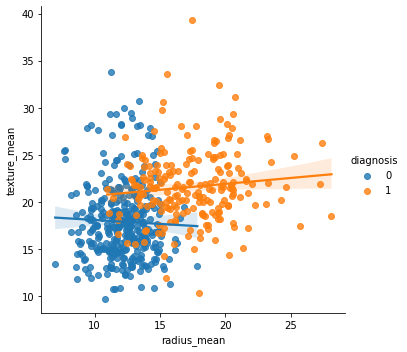

In [63]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df) 

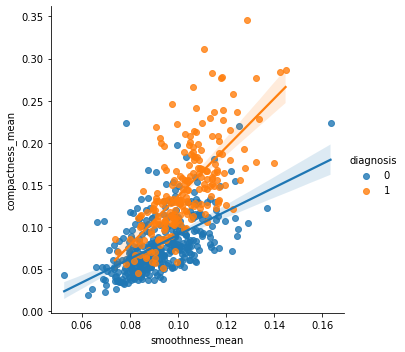

In [64]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis') 

In [65]:
X = df.drop('diagnosis',axis='columns')
y = df.diagnosis

Text(0, 0.5, 'Total Number of Patients')

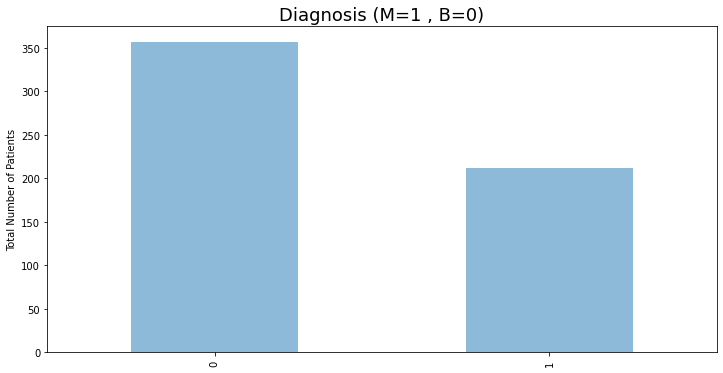

In [66]:
df.diagnosis.value_counts().plot(kind='bar', alpha = 0.5, figsize=(12,6))
plt.title("Diagnosis (M=1 , B=0)", fontsize = '18')
plt.ylabel("Total Number of Patients")

# SVM

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

We split the data to train and test data using train_test_split from sklearn

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [69]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
190,14.22,23.12,94.37,609.9,0.10750,0.24130,0.198100,0.06618,0.2384,0.07542,...,15.74,37.18,106.40,762.4,0.15330,0.93270,0.84880,0.17720,0.5166,0.14460
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.099660,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,20.31,27.06,132.90,1288.0,0.10000,0.10880,0.151900,0.09333,0.1814,0.05572,...,24.33,39.16,162.30,1844.0,0.15220,0.29450,0.37880,0.16970,0.3151,0.07999
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.01638,0.1847,0.06019,...,13.45,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
245,10.48,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.15150,0.10260,0.11810,0.06736,0.2883,0.07748


training SVM model and predict the X_test

In [70]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
y_pred = svm.predict(X_test)

checking the accuracy of the model which is %96.64 and then Model Precision: %93.84 and Model Recall:96.82

In [73]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [74]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9384615384615385
Recall: 0.9682539682539683


# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [79]:
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

In [83]:
y_predict = rf.predict(X_test)

checking the accuracy of the model which is %97.66 and then Model Precision: %100 and Model Recall:93.36

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9766081871345029


In [85]:
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Precision: 1.0
Recall: 0.9365079365079365
